# UK CENSUS ANALYSIS - Fundamentals of Data Science

## Data Cleaning
First of all, the required python libraries are imported to read in the census data provided for analysis. Then, we proceed with checking for errors or abnormalities in the data before cleaning it.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The census data is a csv file and it is imported through pandas; 
# assigned to a dataframe "census_data"
census_data = pd.read_csv("census_15_2022.csv")

In [3]:
census_data 

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Morar Lane,Stephanie,Turner,48.0,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist
1,1,1,Morar Lane,Nathan,Turner-Owen,52.0,Husband,Married,Male,Mudlogger,None,Methodist
2,2,1,Morar Lane,Lee,Turner-Owen,17.0,Son,NaN,Male,Student,None,NaN
3,3,1,Morar Lane,James,Turner-Owen,14.0,Son,NaN,Male,Student,None,NaN
4,4,1,Morar Lane,Charlotte,Turner-Owen,14.0,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10588,10588,1,Hollywood Barracks,Shirley,Goddard,21.0,Head,Divorced,Female,Unemployed,None,None
10589,10589,1,Hollywood Barracks,Aaron,Goddard,1.0,Son,NaN,Male,Child,None,NaN
10590,10590,1,Hollywood Barracks,Steven,Leonard,57.0,Lodger,Widowed,Male,"Sound technician, broadcasting/film/video",None,Muslim
10591,10591,1,Hollywood Barracks,Martin,Young,18.0,Lodger,Divorced,Male,Student,None,NaN


In [4]:
census_data.info() # checks for the entries, columns, null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10593 non-null  int64  
 1   House Number                   10593 non-null  object 
 2   Street                         10593 non-null  object 
 3   First Name                     10593 non-null  object 
 4   Surname                        10593 non-null  object 
 5   Age                            10593 non-null  float64
 6   Relationship to Head of House  10593 non-null  object 
 7   Marital Status                 7986 non-null   object 
 8   Gender                         10593 non-null  object 
 9   Occupation                     10593 non-null  object 
 10  Infirmity                      10593 non-null  object 
 11  Religion                       7911 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usa

### Problems with the imported dataset

From the imformation displayed above:

1. The "unnamed: 0" column is not needed because it has nothing to do with cleaning of the given data.

2. There are null values in:
    1. Marital Status
    2. Religion

3. Also, we need to check the datatype for each attribute (column). Age is meant to be an integer, not float

4. The 11 columns must be thoroughly cleaned in cases of age with minors, null values and  NA values for entries. e.g. minors should have no religion and marital status, etc.

In [5]:
census = census_data.drop(["Unnamed: 0"], axis = 1) # This removes the unnamed: 0 column from the dataframe

In [6]:
census # The refined dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Morar Lane,Stephanie,Turner,48.0,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist
1,1,Morar Lane,Nathan,Turner-Owen,52.0,Husband,Married,Male,Mudlogger,None,Methodist
2,1,Morar Lane,Lee,Turner-Owen,17.0,Son,NaN,Male,Student,None,NaN
3,1,Morar Lane,James,Turner-Owen,14.0,Son,NaN,Male,Student,None,NaN
4,1,Morar Lane,Charlotte,Turner-Owen,14.0,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10588,1,Hollywood Barracks,Shirley,Goddard,21.0,Head,Divorced,Female,Unemployed,None,None
10589,1,Hollywood Barracks,Aaron,Goddard,1.0,Son,NaN,Male,Child,None,NaN
10590,1,Hollywood Barracks,Steven,Leonard,57.0,Lodger,Widowed,Male,"Sound technician, broadcasting/film/video",None,Muslim
10591,1,Hollywood Barracks,Martin,Young,18.0,Lodger,Divorced,Male,Student,None,NaN


In [7]:
census["Age"] = census["Age"].astype("int64") # Converts the age datatype from float to int

In [8]:
census.describe(include = "all") # Shows the details of the whole dataset

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,10593,10593,10593,10593,10593.000000,10593,7986,10593,10593,10593,7911
unique,239,105,365,689,NaN,21,8,9,1101,8,14
top,1,Warren Shoals,Mandy,Smith,NaN,Head,Single,Female,Student,None,None
freq,346,910,45,270,NaN,3541,3607,5354,2148,10521,3381
mean,NaN,NaN,NaN,NaN,35.283300,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,21.303604,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN


Here, the data features have is to be checked starting from the first column to ensure clarity and for proper processing. Since the unneeded column has been removed, we need to identify unique values, missing values and empty entries. Then, any errors found needs to be cleaned appropriately.

#### 1. House Number

In [9]:
census["House Number"].unique() # Checks for the house number possible elements in the census data

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [10]:
census[census["House Number"] == " "] # Checks for any empty value available

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [11]:
countError = census["House Number"].value_counts()["Five"] # The assigned variable checks for inappropriate house number(s).
countError

1

In [12]:
# The replace function is used to change the house number in words to figure
census["House Number"] = census["House Number"].replace("Five", "5")

In [13]:
# Checks and shows any null value present in each column
census.isnull().any()


House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

In [14]:
census["House Number"].unique() # To verify the entry is correct

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

#### 2. Street

In [15]:
census["Street"].unique() # Unique values in street is diplayed and errors can be spotted and corrected

array(['Morar Lane', 'Hooper Avenue', 'Kingnod Road', 'Lobster Key',
       'Smith Island', 'Lawson Villages', 'Evans Mission', 'Steel Forest',
       'Ryan Well', 'Dragons Road', 'Holmes Ways', 'Oaktree Street',
       'Harding Plaza', 'Leicester Road', 'Turner Avenue',
       'Fletcher Common', 'Jackson Drive', 'Phillips Turnpike',
       'Wolverhampton Avenue', 'Laurel Parks', 'Bailey Rapid',
       'Duck Mission', 'Hangar Isle', 'Allen Crossroad', 'Fraser Avenue',
       'Powys Lane', 'Oakthwaite Avenue', 'Perth Street',
       'Scotland Views', 'Mistry Keys', 'Brooks Dale',
       'Canterburyarch Avenue', 'Freeman Roads', 'Todd Lane',
       'Polaris Lane', 'Armagh Lane', 'Narwhal Parkways', 'Main Trail',
       'Tegid Branch', 'Wilson Streets', 'Fisher Plains', 'Arch Garden',
       "O'Donnell Ville", 'Patel Highway', 'Whitehouse Harbor',
       'Harris Streets', 'ExcaliburBells Avenue', 'Adams Drive',
       'Williams Drive', 'Newport Wall', 'Thorpe Lane', 'Jones Keys',
       '

In [16]:
# Check for any null value in street
census["Street"].isnull().any()


False

In [17]:
census[census["Street"] == " "] # Checks for empty entries in street but none was found

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [18]:
census['Street'].value_counts()

Warren Shoals         910
White Avenue          721
Tegid Road            675
Coates Lane           502
Allen Crossroad       435
                     ... 
Summer Barn             5
West Windmill           5
Hollywood Barracks      5
Collier Hall            4
Gregory Tower           2
Name: Street, Length: 105, dtype: int64

#### 3. First Name

In [19]:
census["First Name"].unique() # Checks for the first name data series

array(['Stephanie', 'Nathan', 'Lee', 'James', 'Charlotte', 'Linda',
       'Lynn', 'Leigh', 'Ann', 'Dale', 'Joyce', 'Grace', 'Jay', 'Alison',
       'Bernard', 'Simon', 'Anna', 'Bethany', 'Lindsey', 'Gerard',
       'Joshua', 'Neil', 'Paula', 'Sam', 'Lucy', 'Carole', 'Marilyn',
       'Christian', 'Jack', 'Peter', 'Katy', 'Anthony', 'Ashleigh',
       'Gareth', 'Howard', 'Chelsea', 'Graham', 'Debra', 'Lesley',
       'Hilary', 'Brian', 'Trevor', 'Josh', 'Denis', 'Stephen', 'Sian',
       'Roger', 'Dennis', 'Justin', 'Brenda', 'Annette', 'Clare',
       'Clifford', 'Kyle', 'Mandy', 'Lawrence', 'Gavin', 'Pamela',
       'Garry', 'Louise', 'Samantha', 'Tony', 'Carolyn', 'Paige', 'Jayne',
       'Owen', 'Jasmine', 'Martyn', 'Dylan', 'Laura', 'Julian', 'Charles',
       'Megan', 'Damien', 'Leonard', 'Judith', 'Leanne', 'Vanessa',
       'Paul', 'Bethan', 'Diane', 'Marcus', 'Susan', 'Michelle', 'Eileen',
       'Jeffrey', 'Aimee', 'Rebecca', 'Michael', 'Sophie', 'Patrick',
       'Terence', 

In [20]:
census[census["First Name"] == " "] # Verifies if there are missing values in the first name entry

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [21]:
census["First Name"].isnull().any() # Checks for null values 

False

In [22]:
# The replace function is used to replace any  in the error with an appropriate one
# In this case, the empty space after the name 'Marion' is corrected
census["First Name"] = census["First Name"].replace(['Marion ', 'Marion'])

In [23]:
census["First Name"].unique()

array(['Stephanie', 'Nathan', 'Lee', 'James', 'Charlotte', 'Linda',
       'Lynn', 'Leigh', 'Ann', 'Dale', 'Joyce', 'Grace', 'Jay', 'Alison',
       'Bernard', 'Simon', 'Anna', 'Bethany', 'Lindsey', 'Gerard',
       'Joshua', 'Neil', 'Paula', 'Sam', 'Lucy', 'Carole', 'Marilyn',
       'Christian', 'Jack', 'Peter', 'Katy', 'Anthony', 'Ashleigh',
       'Gareth', 'Howard', 'Chelsea', 'Graham', 'Debra', 'Lesley',
       'Hilary', 'Brian', 'Trevor', 'Josh', 'Denis', 'Stephen', 'Sian',
       'Roger', 'Dennis', 'Justin', 'Brenda', 'Annette', 'Clare',
       'Clifford', 'Kyle', 'Mandy', 'Lawrence', 'Gavin', 'Pamela',
       'Garry', 'Louise', 'Samantha', 'Tony', 'Carolyn', 'Paige', 'Jayne',
       'Owen', 'Jasmine', 'Martyn', 'Dylan', 'Laura', 'Julian', 'Charles',
       'Megan', 'Damien', 'Leonard', 'Judith', 'Leanne', 'Vanessa',
       'Paul', 'Bethan', 'Diane', 'Marcus', 'Susan', 'Michelle', 'Eileen',
       'Jeffrey', 'Aimee', 'Rebecca', 'Michael', 'Sophie', 'Patrick',
       'Terence', 

In [24]:
census["First Name"] == 'Marion'

0        False
1        False
2        False
3        False
4        False
         ...  
10588    False
10589    False
10590    False
10591    False
10592    False
Name: First Name, Length: 10593, dtype: bool

#### SURNAME

In [25]:
census["Surname"].unique() # Show the Surnames in the data given

array(['Turner', 'Turner-Owen', 'Wilson', 'Moore', 'Brown', 'Johnson',
       'Fletcher', 'Roberts-Fletcher', 'Bird', 'Taylor', 'Clark',
       'Hanson', 'Shepherd', 'Carroll', 'Cooper', 'Lord', 'Pearce',
       'Dixon-Lord', 'Holloway', 'Wells', 'Sharp', 'Kelly', 'Mann',
       'Begum', 'Hall', 'Short', 'Smith', 'Graham', 'Hurst', 'Hobbs',
       'Turnbull-Jones', 'Parry', 'Chapman', 'Lee', 'Watts', 'Jarvis',
       'Palmer', 'Pritchard', 'Walker', 'Clements', 'Iqbal', 'Morris',
       'Bevan', 'Baker', 'Chan', 'Jones', 'Thompson', 'Woodward',
       'Thomas', 'Mitchell', 'Davies', 'Duffy', 'Mistry', 'Patel',
       'Chambers', 'Pearson', 'Wright', 'Swift', 'Bishop', 'Byrne',
       'Campbell', 'Stokes', 'Howarth', 'Rose', 'Owen', 'Jennings',
       'Harper', 'Green', 'Hammond', 'Hunt', 'Connor', 'Roberts', 'Hardy',
       "O'Sullivan", 'Wall', 'Singh', 'Smart', 'Fox', 'Parsons',
       'Williamson', 'Williams', 'Griffiths', 'Bibi', 'Allen', 'Martin',
       'Woods', 'Hodgson', 'Reed'

In [26]:
census["Surname"].isnull().any() # Checks for any null values in the surname entry

False

In [27]:
census[census["Surname"] == " "] # Checks for people with no surname filled in

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8888,27,White Avenue,Kelly,,0,Daughter,NaN,Female,Child,None,NaN
8965,50,White Avenue,Naomi,,43,Head,Divorced,Female,"Scientist, marine",None,Catholic
10140,2,Newcastle Trail,Elaine,,45,Daughter,Single,Female,Music therapist,None,Christian


The people in the cell above with no given surname needs to be checked and corrected. To do this, the House number and Street could be checked to see if they share thesame surname with everyone in the household.

In [28]:
# Kelly's house address
census.loc[(census['Street'] == 'White Avenue') & (census['House Number'] == '27')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8885,27,White Avenue,Joe,Mellor,21,Head,Divorced,Male,University Student,None,None
8886,27,White Avenue,Joan,Mellor,5,Daughter,NaN,Female,Student,None,NaN
8887,27,White Avenue,Frances,Mellor,1,Daughter,NaN,Female,Child,None,NaN
8888,27,White Avenue,Kelly,,0,Daughter,NaN,Female,Child,None,NaN


In [29]:
# Naomi's house address
census.loc[(census['Street'] == 'White Avenue') & (census['House Number'] == '50')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8965,50,White Avenue,Naomi,,43,Head,Divorced,Female,"Scientist, marine",None,Catholic
8966,50,White Avenue,Mandy,Begum,9,Daughter,NaN,Female,Student,None,NaN
8967,50,White Avenue,Frank,Begum,5,Son,NaN,Male,Student,None,NaN
8968,50,White Avenue,Dominic,Begum,1,Son,NaN,Male,Child,None,NaN
8969,50,White Avenue,Marcus,Burton,25,Visitor,Single,Male,Therapeutic radiographer,None,Catholic


In [30]:
# Elaine's house address
census.loc[(census['Street'] == 'Newcastle Trail') & (census['House Number'] == '2')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10139,2,Newcastle Trail,Irene,West,63,Head,Single,Female,Veterinary surgeon,None,Christian
10140,2,Newcastle Trail,Elaine,,45,Daughter,Single,Female,Music therapist,None,Christian


In [31]:
# All three with no given surname will take thesame surname with their corresponding 
# household because other occupants share thesame surname as well. Also, the
# is based on their respective relationship to head of house.
census.loc[8888, "Surname"] = "Mellor"
census.loc[8965, "Surname"] = "Begum"
census.loc[10140, "Surname"] = "West"

In [32]:
census[census["Surname"] == " "] # The output shows there are no more empty fields in surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### AGE

In [33]:
census["Age"].unique() # checks for the age data series

array([ 48,  52,  17,  14,  45,   7,  81,  84,  50,  49,  85,  88,  53,
        57,  69,  59,  66,  67,  32,   6,  34,   5,   2,  20,  75,  43,
        44,  31,  36,  15,  11,  68,  71,  30,  28,  26,  22,   8,  47,
        86,  60,  27,  10,  35,   0,  72,  38,  39,   3,   1,  62,  41,
        64,   4,   9,  58,  29,  33,  56,  25,  63,  42,  54,  13,  18,
        19,  16,  12,  21,  24,  37,  70,  87,  40,  55,  46,  80,  23,
        65,  61,  76,  74,  89,  90,  93,  94,  51,  77,  82,  78,  73,
        79, 104,  83, 105, 106,  91,  98,  92,  97, 100,  95,  99, 102],
      dtype=int64)

In [34]:
census["Age"] = census["Age"].astype("int64") # The astype() function converts the age data type to integer

In [35]:
census["Age"].unique()

array([ 48,  52,  17,  14,  45,   7,  81,  84,  50,  49,  85,  88,  53,
        57,  69,  59,  66,  67,  32,   6,  34,   5,   2,  20,  75,  43,
        44,  31,  36,  15,  11,  68,  71,  30,  28,  26,  22,   8,  47,
        86,  60,  27,  10,  35,   0,  72,  38,  39,   3,   1,  62,  41,
        64,   4,   9,  58,  29,  33,  56,  25,  63,  42,  54,  13,  18,
        19,  16,  12,  21,  24,  37,  70,  87,  40,  55,  46,  80,  23,
        65,  61,  76,  74,  89,  90,  93,  94,  51,  77,  82,  78,  73,
        79, 104,  83, 105, 106,  91,  98,  92,  97, 100,  95,  99, 102],
      dtype=int64)

In [36]:
census[census["Age"] == " "] # Verifies for an empty field in age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [37]:
census["Age"].isna().any() # To make sure there are no N/A fields in age

False

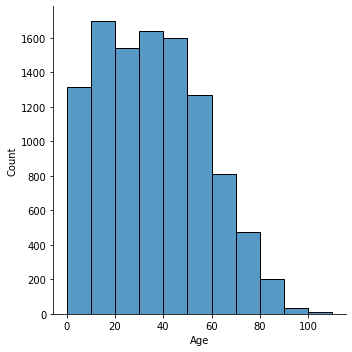

In [38]:
sns.displot(census["Age"], binwidth = 10) # This plot shows the age with the number of people in the group respectively

#### RELATIONSHIP TO HEAD OF HOUSE 

In [39]:
census["Relationship to Head of House"].unique() # Shows the different relationship to head of house

array(['Head', 'Husband', 'Son', 'Daughter', 'Wife', 'Cousin', 'Partner',
       'Grandson', 'Adopted Grandson', 'Lodger', 'Adopted Daughter',
       'Sibling', 'Granddaughter', 'None', 'Step-Son', 'Visitor',
       'Step-Daughter', 'Adopted Son', 'Neice', 'Nephew', 'Son-in-law'],
      dtype=object)

In [40]:
# Firstly, the typographical error is checked and 'Niece' is replace with 'Niece'
census["Relationship to Head of House"] = census["Relationship to Head of House"].replace(["Neice", "Niece"])

In [41]:
census[census["Relationship to Head of House"] == " "] # Empty field are checked, and none was found here

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [42]:
# Checking through the house address
census.loc[(census['Street'] == 'Evans Mission') & (census['House Number'] == '40')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
451,40,Evans Mission,Kyle,Wallace,78,Head,Married,Male,Retired Senior tax professional/tax inspector,None,None
452,40,Evans Mission,Sylvia,Wallace,76,Wife,Married,Female,Retired Insurance account manager,None,None
453,40,Evans Mission,Louise,Walsh,32,None,Married,Female,Psychiatric nurse,None,Muslim
454,40,Evans Mission,Clive,Walsh,34,None,Married,Male,Human resources officer,None,None
455,40,Evans Mission,Irene,Walsh,13,None,NaN,Female,Student,None,NaN


In [43]:
# The output here shows the people with no relationship with head of house
census[(census["Relationship to Head of House"] == "None") & (census['Marital Status'] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
453,40,Evans Mission,Louise,Walsh,32,None,Married,Female,Psychiatric nurse,None,Muslim
454,40,Evans Mission,Clive,Walsh,34,None,Married,Male,Human resources officer,None,None
1316,2,Turner Avenue,Donna,Shaw,26,None,Married,Female,Land,None,Sikh
1317,2,Turner Avenue,Justin,Shaw,27,None,Married,Male,Financial risk analyst,None,None
2499,32,Fraser Avenue,Hilary,Ellis,39,None,Married,Female,Advice worker,None,None
2500,32,Fraser Avenue,Christian,Ellis,39,None,Married,Male,Unemployed,None,None
6732,159,Warren Shoals,Shaun,Hill,33,None,Married,Male,"Designer, graphic",None,None
6733,159,Warren Shoals,Lesley,Hill,33,None,Married,Female,Amenity horticulturist,None,None
7004,231,Warren Shoals,Charlotte,Whitehead,57,None,Married,Female,Estate agent,None,Methodist
7005,231,Warren Shoals,Derek,Whitehead,59,None,Married,Male,Medical physicist,None,Methodist


In [44]:
census["Relationship to Head of House"].isna().any() # To show any N/A values

False

### MARITAL STATUS

In [45]:
census["Marital Status"].unique() # Shows marital status of the data series and  check for errors

array(['Married', nan, 'Divorced', 'Single', 'Widowed', 'D', 'S', 'M',
       'W'], dtype=object)

In [46]:
# The marital should be replaced appropriately and people under 18 has no marital status
census["Marital Status"] = census["Marital Status"].replace(["M", "S", "D", "W", np.nan], ["Married", "Single", "Divorced", "Widowed", "NA"])

In [47]:
census["Marital Status"].unique() # Corrected marital status values

array(['Married', 'NA', 'Divorced', 'Single', 'Widowed'], dtype=object)

In [48]:
census["Marital Status"].isnull().any() # shows null values, but no null value was found

False

In [49]:
# Iterating using people aged 18 and above and marital status to check and correct
# if anyone in that group is not married, divorced, widowed or single
census[(census["Age"] >= 18) & (census["Marital Status"] == 'NA')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [50]:
# No one is underage and windowed, the code output below confirms that
census[(census["Age"] < 18) & (census["Marital Status"] == 'Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
# This checks for people under 18 and are married. The acceptable marriage age is 18 and over
census[(census["Age"] < 18) & (census["Marital Status"] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2141,55,Allen Crossroad,Lindsey,Phillips,17,Head,Married,Female,Student,None,NaN
2537,45,Fraser Avenue,Michelle,Bevan,16,Head,Married,Female,Student,None,NaN
7755,47,Tegid Road,Barbara,Chamberlain,17,Head,Married,Female,Student,None,NaN


In [52]:
# To rectify this, the house address (for each person) will be checked to see how
# they're related to their respective household members

# For Lindsey Philips
census.loc[(census['Street'] == 'Allen Crossroad') & (census['House Number'] == '55')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2141,55,Allen Crossroad,Lindsey,Phillips,17,Head,Married,Female,Student,None,NaN
2142,55,Allen Crossroad,Leslie,Phillips,20,Husband,Married,Male,University Student,None,NaN
2143,55,Allen Crossroad,Catherine,Phillips,0,Daughter,NA,Female,Child,None,NaN
2144,55,Allen Crossroad,Denis,Jones,49,Lodger,Single,Male,"Psychologist, counselling",None,Christian
2145,55,Allen Crossroad,Emily,Kent,47,Lodger,Single,Female,Armed forces logistics/support/administrative ...,None,None


In [53]:
# For Michelle Bevan
census.loc[(census['Street'] == 'Fraser Avenue') & (census['House Number'] == '45')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2537,45,Fraser Avenue,Michelle,Bevan,16,Head,Married,Female,Student,None,NaN
2538,45,Fraser Avenue,Gary,Bevan,19,Husband,Married,Male,University Student,None,None
2539,45,Fraser Avenue,Callum,Jones,58,Lodger,Single,Male,Politician's assistant,None,Christian
2540,45,Fraser Avenue,Stuart,Turner,52,Lodger,Divorced,Male,"Engineer, water",None,Christian


In [54]:
# For Barbara Chamberlain
census.loc[(census['Street'] == 'Tegid Road') & (census['House Number'] == '47')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7755,47,Tegid Road,Barbara,Chamberlain,17,Head,Married,Female,Student,None,NaN
7756,47,Tegid Road,Conor,Chamberlain,22,Husband,Married,Male,University Student,None,NaN
7757,47,Tegid Road,Kyle,Chamberlain,0,Son,NA,Male,Child,None,NaN
7758,47,Tegid Road,Colin,Jackson,36,Lodger,Single,Male,Operations geologist,None,None
7759,47,Tegid Road,Kim,Cox,55,Lodger,Single,Female,Translator,None,Methodist


It was discovered that these 3 people are married as shown in the previous output cells. They are also the head of House. But they share surname with the husbands in each case. It is then assumed that it was a numerical typo error in the fields. However, the assumed age for all 3 females is 18 which is also the accepted age for the head of house.

In [55]:
# The .loc[] function replaces the age entries with 18 years
census.loc[2141, "Age"] = 18
census.loc[2537, "Age"] = 18
census.loc[7755, "Age"] = 18

In [56]:
# This comfirms that the proper corrections were made using the street and house number
census.loc[(census['Street'] == 'Allen Crossroad') & (census['House Number'] == '55')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2141,55,Allen Crossroad,Lindsey,Phillips,18,Head,Married,Female,Student,None,NaN
2142,55,Allen Crossroad,Leslie,Phillips,20,Husband,Married,Male,University Student,None,NaN
2143,55,Allen Crossroad,Catherine,Phillips,0,Daughter,NA,Female,Child,None,NaN
2144,55,Allen Crossroad,Denis,Jones,49,Lodger,Single,Male,"Psychologist, counselling",None,Christian
2145,55,Allen Crossroad,Emily,Kent,47,Lodger,Single,Female,Armed forces logistics/support/administrative ...,None,None


In [57]:
# 
census.loc[(census['Street'] == 'Fraser Avenue') & (census['House Number'] == '45')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2537,45,Fraser Avenue,Michelle,Bevan,18,Head,Married,Female,Student,None,NaN
2538,45,Fraser Avenue,Gary,Bevan,19,Husband,Married,Male,University Student,None,None
2539,45,Fraser Avenue,Callum,Jones,58,Lodger,Single,Male,Politician's assistant,None,Christian
2540,45,Fraser Avenue,Stuart,Turner,52,Lodger,Divorced,Male,"Engineer, water",None,Christian


In [58]:
census.loc[(census['Street'] == 'Tegid Road') & (census['House Number'] == '47')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7755,47,Tegid Road,Barbara,Chamberlain,18,Head,Married,Female,Student,None,NaN
7756,47,Tegid Road,Conor,Chamberlain,22,Husband,Married,Male,University Student,None,NaN
7757,47,Tegid Road,Kyle,Chamberlain,0,Son,NA,Male,Child,None,NaN
7758,47,Tegid Road,Colin,Jackson,36,Lodger,Single,Male,Operations geologist,None,None
7759,47,Tegid Road,Kim,Cox,55,Lodger,Single,Female,Translator,None,Methodist


In [59]:
# The output below explains that 2 people have thesame similarities in
# their marital status and relationship to head of house. They are daughters
# to the respective head of house. Hence, the need to check for their household
census.loc[(census['Age'] <= 18) & (census['Marital Status'] == 'Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1704,7,Laurel Parks,Gillian,Carter,18,Daughter,Widowed,Female,Student,None,Christian
9718,31,Edwards Vista,Rosemary,Sullivan,18,Daughter,Widowed,Female,Student,None,Christian


In [60]:
# For Gillian Carter
census.loc[(census['Street'] == "Laurel Parks") & (census['House Number'] == '7')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1703,7,Laurel Parks,Dawn,Carter,49,Head,Divorced,Female,Outdoor activities/education manager,Physical Disability,Christian
1704,7,Laurel Parks,Gillian,Carter,18,Daughter,Widowed,Female,Student,None,Christian
1705,7,Laurel Parks,Lindsey,Carter,15,Daughter,NA,Female,Student,None,NaN


In [61]:
# Rosemary Sullivan
census.loc[(census['Street'] == "Edwards Vista") & (census['House Number'] == '31')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9714,31,Edwards Vista,Claire,Sullivan,56,Head,Married,Female,"Designer, multimedia",None,Christian
9715,31,Edwards Vista,Roger,Sullivan,58,Husband,Married,Male,Unemployed,None,Christian
9716,31,Edwards Vista,Emily,Sullivan,23,Daughter,Single,Female,Dentist,None,Christian
9717,31,Edwards Vista,Carolyn,Sullivan,21,Daughter,Divorced,Female,University Student,None,Christian
9718,31,Edwards Vista,Rosemary,Sullivan,18,Daughter,Widowed,Female,Student,None,Christian


In [62]:
# It could be concluded that both are single as 
# they just got married and can't be widowed at that age

census.loc[1704, "Marital Status"] = "Single"
census.loc[9718, "Marital Status"] = "Single"


<AxesSubplot:xlabel='Age', ylabel='Marital Status'>

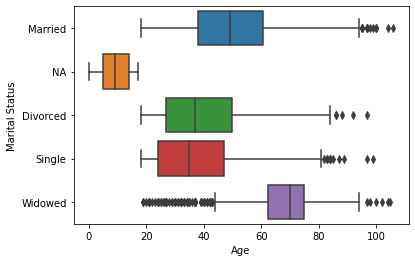

In [63]:
sns.boxplot(data = census, x = "Age", y = "Marital Status")

Text(0.5, 1.0, 'Age against relationship to Head of House')

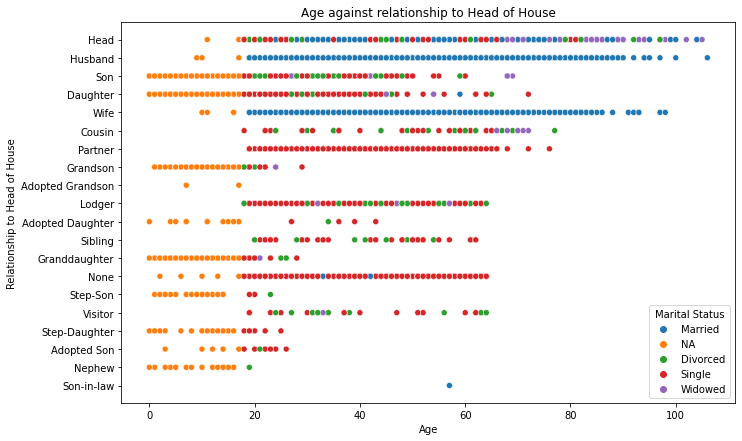

In [64]:
# The plot belows displays the census data age series and 
# relationship to head of house with respect to their 
# marital status
plt.figure(figsize = (11,7))
sns.scatterplot(data = census, x = "Age", y = "Relationship to Head of House", hue = "Marital Status")
plt.title("Age against relationship to Head of House")

#### GENDER

In [65]:
census["Gender"].unique() # unique values under gender and errors are found

array(['Female', 'Male', 'F', 'male', 'female', 'M', 'f', 'm', ' '],
      dtype=object)

In [66]:
census[census["Gender"] == " "] # checks for empty field(s) in gender

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2101,43,Allen Crossroad,Victoria,Quinn,51,Head,Divorced,,Unemployed,None,None


In [67]:
# The house address is used to check where the person stays and 
# figure out the gender
census.loc[(census['Street'] == 'Allen Crossroad') & (census['House Number'] == '43')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2101,43,Allen Crossroad,Victoria,Quinn,51,Head,Divorced,,Unemployed,None,None
2102,43,Allen Crossroad,Callum,Quinn,13,Son,NA,Male,Student,None,NaN
2103,43,Allen Crossroad,Danielle,Quinn,11,Daughter,NA,Female,Student,None,NaN


In [68]:
# The code above didn't quite solve that, so the surname and marital status are checked
# and only the person comes up in the output
census.loc[(census['Surname'] == 'Quinn') & (census['Marital Status'] == 'Divorced')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2101,43,Allen Crossroad,Victoria,Quinn,51,Head,Divorced,,Unemployed,None,None


In [69]:
# The previous step didn't work as well, 
# The first name data series is checked to be certain
# which gender, which is female as displayed in the next output
census[census["First Name"] == "Victoria"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
192,31,Kingnod Road,Victoria,Parsons,55,Head,Married,Female,Neurosurgeon,None,None
329,5,Lawson Villages,Victoria,Ward,13,Daughter,NA,Female,Student,None,NaN
338,7,Lawson Villages,Victoria,Newman,3,Daughter,NA,Female,Child,None,NaN
632,109,Evans Mission,Victoria,Edwards,63,Head,Widowed,Female,"Scientist, marine",None,Catholic
745,18,Ryan Well,Victoria,Hall,50,Partner,Single,Female,Chiropodist,None,None
1551,33,Jackson Drive,Victoria,Collins,37,Head,Married,Female,Hydrographic surveyor,None,Christian
1812,30,Duck Mission,Victoria,Jenkins,42,Head,Married,Female,Adult guidance worker,None,None
2101,43,Allen Crossroad,Victoria,Quinn,51,Head,Divorced,,Unemployed,None,None
2160,60,Allen Crossroad,Victoria,Parker,7,Daughter,NA,Female,Student,None,NaN
2481,25,Fraser Avenue,Victoria,Ford,68,Head,Married,Female,Retired Exhibition designer,None,Catholic


In [70]:
census.loc[2101, "Gender"] = "Female"

In [71]:
census[census["Gender"] == " "] # To comfirm the previous output

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [72]:
# There are only 2 known genders , which is Male and Female
# The replace function is used tpo correct these errors
census["Gender"] = census["Gender"].replace(["M", "F", "m", "f", "male", "female"], ["Male", "Female", "Male", "Female", "Male", "Female"])

In [73]:
census["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

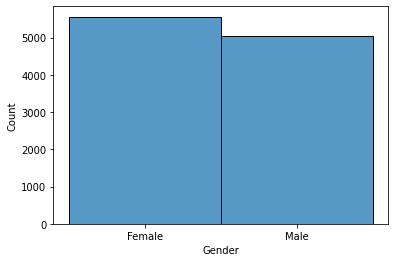

In [74]:
sns.histplot(census["Gender"]) # A plot to show the gender with most population

Text(0.5, 1.0, 'Gender against marital status')

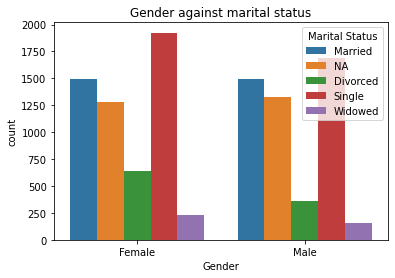

In [75]:
# The plot to show the genders and their respective marital status
sns.countplot(x = census["Gender"], data = census, hue = "Marital Status")
plt.title("Gender against marital status")

### OCCUPATION

In [76]:
# Verify and display the unique values in occupation
census["Occupation"].unique()

array(['Chartered legal executive (England and Wales)', 'Mudlogger',
       'Student', ..., 'Retired Podiatrist',
       'Retired General practice doctor', 'Retired Engineer, land'],
      dtype=object)

In [77]:
census[census["Occupation"] == " "] # It shows there are no empty values in occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [78]:
census["Occupation"].isnull().any() # No null value(s) was found

False

In [79]:
# People aged over 15 years and less than 18 years are checked and they can be on student jobs as PAYE
# but they can't commute out of the town
census.loc[(census["Age"] > 15) & (census["Age"] < 18)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Morar Lane,Lee,Turner-Owen,17,Son,NA,Male,Student,None,NaN
138,14,Kingnod Road,Jay,Swift,16,Son,NA,Male,Student,None,NaN
144,16,Kingnod Road,Leah,Byrne,16,Daughter,NA,Female,Student,None,NaN
149,17,Kingnod Road,Lynne,Campbell,17,Daughter,NA,Female,Student,None,NaN
156,19,Kingnod Road,Sian,Howarth,16,Daughter,NA,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10475,11,Cox Turnpike,Mary,Ellis,16,Daughter,NA,Female,Student,None,NaN
10479,12,Cox Turnpike,Marcus,Lee,17,Son,NA,Male,Student,None,NaN
10483,13,Cox Turnpike,Debra,Edwards,16,Daughter,NA,Female,Student,None,NaN
10549,1,Watson Windmill,Allan,Sims,16,Son,NA,Male,Student,None,NaN


In [80]:
# No one under 18 years and with the conditions(s) is found
census.loc[(census["Age"] < 18 ) & (census["Occupation"] != 'Child') & (census["Occupation"] != "University Student") & (census["Occupation"] != "Student")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [81]:
# It was found out that there were several people aged over 65 years and
# are unemployed. It's assumed that people aged over 65 years should be retired
census.loc[(census["Occupation"] == "Unemployed") & (census["Age"] > 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
195,32,Kingnod Road,Debra,Pearce,66,Head,Widowed,Female,Unemployed,None,None
294,11,Smith Island,Jane,Dale,93,Head,Married,Female,Unemployed,None,None
295,11,Smith Island,Duncan,Dale,94,Husband,Married,Male,Unemployed,None,None
345,11,Lawson Villages,Leanne,Brown-Baker,77,Head,Divorced,Female,Unemployed,None,None
622,106,Evans Mission,Carly,Turnbull,74,Head,Single,Female,Unemployed,None,Christian
738,15,Ryan Well,Mary,Sharp,70,Head,Married,Female,Unemployed,None,Christian
1244,29,Harding Plaza,Hilary,Scott,73,Head,Divorced,Female,Unemployed,None,Christian
1357,22,Turner Avenue,Amy,Hussain,76,Head,Divorced,Female,Unemployed,None,Methodist
1361,24,Turner Avenue,Owen,Hughes,69,Head,Widowed,Male,Unemployed,None,Christian
1626,19,Phillips Turnpike,Clare,Johnson,85,Head,Widowed,Female,Unemployed,None,Christian


In [82]:
# To replace the occupation status for people aged over 65 years with retired
census.loc[census[(census["Occupation"] == "Unemployed") & (census["Age"] > 65)].index, "Occupation"] = "Retired"

In [83]:
census.loc[(census["Occupation"] == "Unemployed") & (census["Age"] > 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [84]:
employment_status = [] # This list is a column added to contain the employment status

for i in census["Occupation"]:
    if i == "Child":
        employment_status.append("Child")
    elif i == "Student":
        employment_status.append("Student")
    elif i == "University Student":
        employment_status.append("University Student")
    elif "Retired" in i:
        employment_status.append("Retired")
    elif i == "Unemployed":
        employment_status.append("Unemployed")
    else:
        employment_status.append("Employed")

census["Employment Status"] = employment_status

In [85]:
census["Employment Status"]

0          Employed
1          Employed
2           Student
3           Student
4           Student
            ...    
10588    Unemployed
10589         Child
10590      Employed
10591       Student
10592      Employed
Name: Employment Status, Length: 10593, dtype: object

In [86]:
census.head(10) # Shows the employment status column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Morar Lane,Stephanie,Turner,48,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist,Employed
1,1,Morar Lane,Nathan,Turner-Owen,52,Husband,Married,Male,Mudlogger,None,Methodist,Employed
2,1,Morar Lane,Lee,Turner-Owen,17,Son,NA,Male,Student,None,NaN,Student
3,1,Morar Lane,James,Turner-Owen,14,Son,NA,Male,Student,None,NaN,Student
4,1,Morar Lane,Charlotte,Turner-Owen,14,Daughter,NA,Female,Student,None,NaN,Student
5,2,Morar Lane,Linda,Wilson,45,Head,Divorced,Female,Armed forces logistics/support/administrative ...,None,None,Employed
6,2,Morar Lane,Lynn,Wilson,7,Daughter,NA,Female,Student,None,NaN,Student
7,3,Morar Lane,Leigh,Moore,81,Head,Married,Male,Retired Chartered certified accountant,None,None,Retired
8,3,Morar Lane,Ann,Moore,84,Wife,Married,Female,Retired Environmental manager,None,None,Retired
9,4,Morar Lane,Dale,Brown,50,Head,Married,Male,Contractor,None,Christian,Employed


Text(0.5, 1.0, 'Age distribution by Occupation')

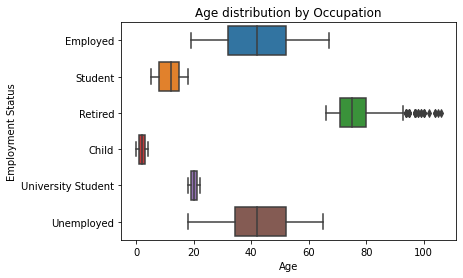

In [87]:
sns.boxplot(data = census, x = "Age", y = "Employment Status")
plt.title("Age distribution by Occupation")

### INFIRMITY

In [88]:
census["Infirmity"].unique() # Uniques values of infirmity

array(['None', 'Disabled', 'Unknown Infection', 'Physical Disability',
       'Blind', ' ', 'Deaf', 'Mental Disability'], dtype=object)

In [89]:
census[census["Infirmity"] == " "] # Shows empty fields in infirmity

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
1055,26,Holmes Ways,Melissa,Barker-Lee,1,Daughter,NA,Female,Child,,NaN,Child
2566,53,Fraser Avenue,Beverley,White,74,Head,Divorced,Female,Retired Media planner,,Christian,Retired
3551,28,Polaris Lane,Amber,Bell,46,Head,Married,Female,"Production designer, theatre/television/film",,Christian,Employed
4584,1,Jones Keys,Maureen,Pritchard,30,Wife,Married,Female,"Therapist, occupational",,None,Employed
4969,51,Mitchell Plaza,Lorraine,Brooks,23,Head,Single,Female,Research scientist (life sciences),,None,Employed
5574,33,Butcher Manors,Jean,Leach,50,Partner,Single,Female,Network engineer,,None,Employed
6180,15,Warren Shoals,Sharon,Davidson,34,Daughter,Divorced,Female,"Pilot, airline",,None,Employed
6426,78,Warren Shoals,Kevin,Wilson,18,Son,Single,Male,Student,,None,Student
7936,74,Tegid Road,Melanie,Harding,36,Head,Single,Female,"Buyer, retail",,Christian,Employed


In [90]:
census['Infirmity'].value_counts()

None                   10521
Physical Disability       21
Unknown Infection         12
Deaf                      10
                           9
Mental Disability          9
Blind                      6
Disabled                   5
Name: Infirmity, dtype: int64

In [91]:
# The empty fields are replaced with "None" 
census['Infirmity'] = census['Infirmity'].replace(" ", "None")

In [92]:
census["Infirmity"].unique() 

array(['None', 'Disabled', 'Unknown Infection', 'Physical Disability',
       'Blind', 'Deaf', 'Mental Disability'], dtype=object)

In [93]:
census[census["Infirmity"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status


In [94]:
census['Infirmity'].value_counts()

None                   10530
Physical Disability       21
Unknown Infection         12
Deaf                      10
Mental Disability          9
Blind                      6
Disabled                   5
Name: Infirmity, dtype: int64

#### RELIGION

In [95]:
# The different religions present in the given data
census["Religion"].unique()

array(['Methodist', nan, 'None', 'Christian', 'Catholic', 'Sikh',
       'Muslim', 'Jewish', ' ', 'Quaker', 'Nope', 'Buddist', 'Bahai',
       'Housekeeper', 'Agnostic'], dtype=object)

In [96]:
census["Religion"].value_counts() # shows the number of people in a particular religion

None           3381
Christian      2471
Catholic       1162
Methodist       637
Muslim          144
Sikh             64
Jewish           36
Bahai             6
Quaker            3
                  2
Nope              2
Buddist           1
Housekeeper       1
Agnostic          1
Name: Religion, dtype: int64

In [97]:
census["Religion"].count() # Number of people with a known religion

7911

In [98]:
# Checks for religion of people below age 18
census[census['Age'] < 18]['Religion'].unique()

array([nan, ' '], dtype=object)

In [99]:

census["Religion"] = census["Religion"].replace([np.nan, "Nope", "Housekeeper", "Quaker", "Agnostic"], ["N/A", "None", "None","None", "None"])

In [100]:
census[census["Religion"] == " "] # only 2 people don't empty values in their religions

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
1387,33,Turner Avenue,Abbie,George,3,Daughter,NA,Female,Child,None,,Child
5816,42,Cunningham Bypass,Leanne,Hall,64,Head,Married,Female,Chartered certified accountant,None,,Employed


In [101]:
census[census["Age"] > 18]['Religion'].unique()

array(['Methodist', 'None', 'Christian', 'Catholic', 'Sikh', 'N/A',
       'Muslim', 'Jewish', 'Buddist', ' ', 'Bahai'], dtype=object)

In [102]:
# Indexing underaged people to have no religion which is N/A
census.loc[census[(census["Age"] < 18)].index, "Religion"] = "N/A"

In [103]:
# Leanne's household (family) practices christianity therefore it can be assumed that hers is christian as well
census.loc[(census["Street"] == "Cunningham Bypass") & (census["House Number"] == "42")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
5816,42,Cunningham Bypass,Leanne,Hall,64,Head,Married,Female,Chartered certified accountant,None,,Employed
5817,42,Cunningham Bypass,Allan,Hall,65,Husband,Married,Male,"Engineer, civil (consulting)",None,Christian,Employed
5818,42,Cunningham Bypass,Charlotte,Hall,23,Daughter,Single,Female,"Psychologist, counselling",None,Christian,Employed


In [104]:
# list of people over 18 years with religion of N/A (Not Applicable)
census.loc[(census["Religion"] == "N/A") & (census["Age"] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
130,11,Kingnod Road,Amber,Chambers,19,Wife,Married,Female,University Student,None,N/A,University Student
542,75,Evans Mission,Lee,Hughes,21,None,Single,Male,University Student,None,N/A,University Student
579,88,Evans Mission,Ruth,Jones,19,Partner,Single,Female,University Student,None,N/A,University Student
619,104,Evans Mission,Kathleen,Mitchell,19,Partner,Single,Female,University Student,None,N/A,University Student
769,29,Ryan Well,Leonard,Craig,21,Partner,Single,Male,University Student,None,N/A,University Student
801,40,Ryan Well,Tracy,Scott,19,Wife,Married,Female,University Student,None,N/A,University Student
2142,55,Allen Crossroad,Leslie,Phillips,20,Husband,Married,Male,University Student,None,N/A,University Student
4379,50,Patel Highway,Gerard,Williams,19,Husband,Married,Male,University Student,None,N/A,University Student
4619,13,Jones Keys,Ian,Warner,19,Husband,Married,Male,Theatre director,None,N/A,Employed
5426,13,Bletchley Groves,Raymond,Richardson,21,Husband,Married,Male,University Student,None,N/A,University Student


In [105]:
census.loc[1387, "Religion"] = "N/A" # She is a child (minor), her religion is Not Applicable (N/A)
census.loc[5816, "Religion"] = "Christian" # She can assume her family's religion


In [106]:
census.loc[census[(census["Religion"] == "N/A") & (census["Age"] > 18)].index, "Religion"] = "None"

In [107]:
# to verify our entries are cleaned
census["Religion"].count()

10593

In [108]:
census["Religion"].value_counts()

None         3402
N/A          2669
Christian    2472
Catholic     1162
Methodist     637
Muslim        144
Sikh           64
Jewish         36
Bahai           6
Buddist         1
Name: Religion, dtype: int64

Text(0.5, 1.0, 'Religion distribution with age')

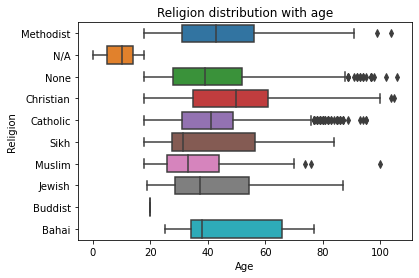

In [109]:
sns.boxplot(data = census, x = "Age", y = "Religion")
plt.title("Religion distribution with age")

In [110]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10593 non-null  object
 1   Street                         10593 non-null  object
 2   First Name                     10593 non-null  object
 3   Surname                        10593 non-null  object
 4   Age                            10593 non-null  int64 
 5   Relationship to Head of House  10593 non-null  object
 6   Marital Status                 10593 non-null  object
 7   Gender                         10593 non-null  object
 8   Occupation                     10593 non-null  object
 9   Infirmity                      10593 non-null  object
 10  Religion                       10593 non-null  object
 11  Employment Status              10593 non-null  object
dtypes: int64(1), object(11)
memory usage: 538.0+ KB


## ANALYSIS AND VISUALIZATION

### AGE DISTRIBUTION
The measure of central tendency such as age mean, median and mode could be described and used to determine the age groups 

In [111]:
average_age = round(census["Age"].mean()) # Mean age of the data series
modal_age = census["Age"].mode()[0] # Modal age of the data series
median_age = round(census["Age"].median()) # Median age of the data series

# The print function below outputs the mean, mode and median ages respectively (in years)
print(f"The average age of the census data is {average_age} years")
print(f"The modal age of the census data is {modal_age} years")
print(f"The median age of the census data is {median_age} years")

The average age of the census data is 35 years
The modal age of the census data is 19 years
The median age of the census data is 34 years


A population age pyramid is created below to show the number of people (for the female and male genders) that falls in a particular age group.

In [112]:
male_gender = census.loc[lambda x:x.Gender == "Male"] # Male gender
female_gender = census.loc[lambda x:x.Gender == "Female"] # female gender

In [113]:
male_age_list = []

count0 = 0
count5 = 0
count10 = 0
count15 = 0
count20 = 0
count25 = 0
count30 = 0
count35 = 0
count40 = 0
count45 = 0
count50 = 0
count55 = 0
count60 = 0
count65 = 0
count70 = 0
count75 = 0
count80 = 0
count85 = 0
count90 = 0
count95 = 0
count99 = 0

for m in male_gender["Age"]:
    if m > 99:
        count99 += 1
    elif m >= 95 and m < 100:
        count95 += 1
    elif m >= 90 and m < 94:
        count90 += 1
    elif m >= 85 and m < 89:
        count85 += 1
    elif m >= 80 and m < 84:
        count80 += 1
    elif m >= 75 and m < 79:
        count75 += 1
    elif m >= 70 and m < 74:
        count70 += 1
    elif m >= 65 and m < 69:
        count65 += 1
    elif m >= 60 and m < 64:
        count60 += 1
    elif m >= 55 and m < 59:
        count55 += 1
    elif m >= 50 and m < 54:
        count50 += 1
    elif m >= 45 and m < 49:
        count45 += 1
    elif m >= 40 and m < 44:
        count40 += 1
    elif m >= 35 and m < 39:
        count35 += 1
    elif m >= 30 and m < 34:
        count30 += 1
    elif m >= 25 and m < 29:
        count25 += 1
    elif m >= 20 and m < 24:
        count20 += 1
    elif m >= 15 and m < 19:
        count15 += 1
    elif m >= 10 and m < 14:
        count10 += 1
    elif m >= 5 and m < 9:
        count5 += 1
    elif m >= 0 and m < 5:
        count0 += 1

count_list = [count99,count95,count90,count85,count80,count75,count70,count65,count60,count55,count50, count45, count40, count35, count30, count25, count20, count15, count10, count5, count0]

for data in count_list:
    male_age_list.append(data)  
    
print(male_age_list)

[5, 8, 5, 27, 56, 84, 111, 136, 187, 245, 244, 284, 310, 306, 269, 259, 325, 346, 308, 296, 290]


In [114]:
female_age_list = []

count0 = 0
count5 = 0
count10 = 0
count15 = 0
count20 = 0
count25 = 0
count30 = 0
count35 = 0
count40 = 0
count45 = 0
count50 = 0
count55 = 0
count60 = 0
count65 = 0
count70 = 0
count75 = 0
count80 = 0
count85 = 0
count90 = 0
count95 = 0
count99 = 0

for f in female_gender["Age"]:
    if f > 99:
        count99 += 1
    elif f >= 95 and f < 100:
        count95 += 1
    elif f >= 90 and f < 94:
        count90 += 1
    elif f >= 85 and f < 89:
        count85 += 1
    elif f >= 80 and f < 84:
        count80 += 1
    elif f >= 75 and f < 79:
        count75 += 1
    elif f >= 70 and f < 74:
        count70 += 1
    elif f >= 65 and f < 69:
        count65 += 1
    elif f >= 60 and f < 64:
        count60 += 1
    elif f >= 55 and f < 59:
        count55 += 1
    elif f >= 50 and f < 54:
        count50 += 1
    elif f >= 45 and f < 49:
        count45 += 1
    elif f >= 40 and f < 44:
        count40 += 1
    elif f >= 35 and f < 39:
        count35 += 1
    elif f >= 30 and f < 34:
        count30 += 1
    elif f >= 25 and f < 29:
        count25 += 1
    elif f >= 20 and f < 24:
        count20 += 1
    elif f >= 15 and f < 19:
        count15 += 1
    elif f >= 10 and f < 14:
        count10 += 1
    elif f >= 5 and f < 9:
        count5 += 1
    elif f >= 0 and f < 5:
        count0 += 1

count_list = [count99,count95,count90,count85,count80,count75,count70,count65,count60,count55,count50, count45, count40, count35, count30, count25, count20, count15, count10, count5, count0]

for data in count_list:
    female_age_list.append(data)  
    
print(female_age_list)

[3, 7, 9, 24, 65, 77, 129, 152, 198, 260, 283, 352, 339, 388, 336, 314, 344, 328, 305, 270, 305]


In [115]:
new_male_ages = []
for i in male_age_list:
    data = (-1*i)
    new_male_ages.append(data)

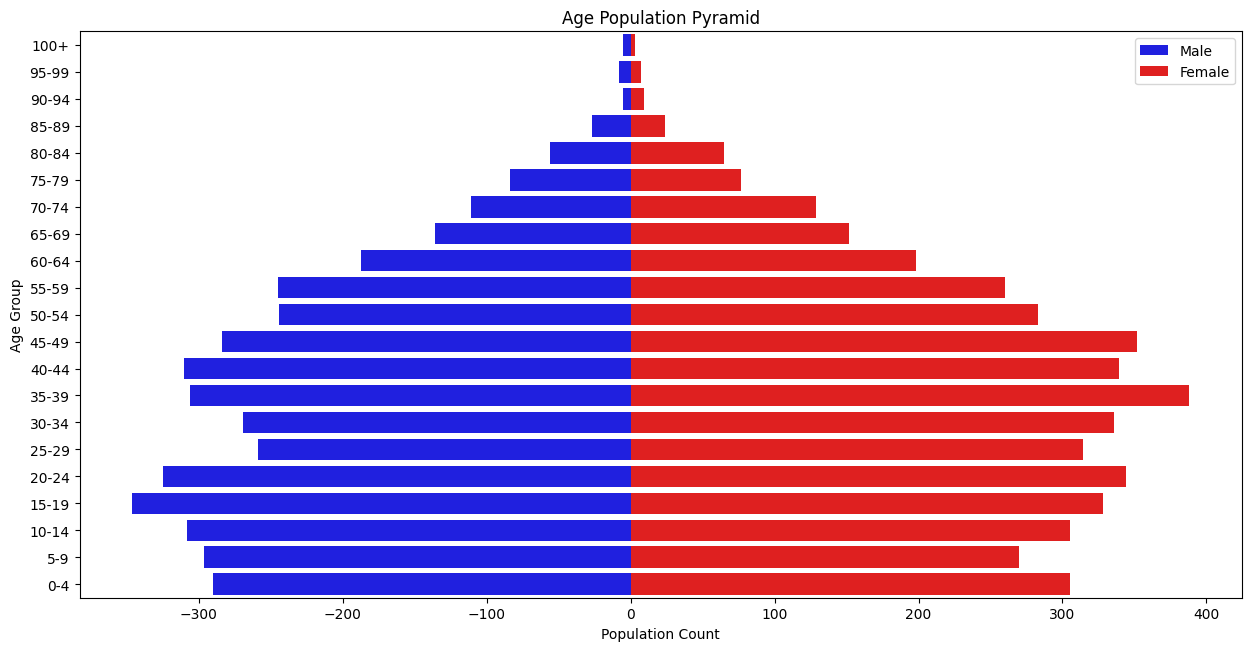

In [116]:
# These lines of code implements the grouping of the given data based on gender and their ages to
# plot an age pyramid for the whole population
age_p = pd.DataFrame({'Age': ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39','30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'], 'Male': new_male_ages, 'Female': female_age_list})

age_group = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39','30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_pyramid_first = plt.figure(figsize = (15,7.5), dpi = 100 ) 
age_pyramid = sns.barplot(x = 'Male', y = 'Age', data = age_p, order = age_group, color = ('blue'), label = 'Male')
age_pyramid = sns.barplot(x ='Female', y = 'Age', data = age_p, order = age_group, color = ('red'), label = 'Female')
age_pyramid.legend()
plt.title("Age Population Pyramid")
age_pyramid.set(xlabel = "Population Count", ylabel = "Age Group")

plt.show()

In [117]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, 105]

order_class = ['100+', '95-99', '90-94', '85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49',
               '40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
age_group = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
         '65-69', '70-74', '75-79', '80-84', '85-89', '90-95','95-99', '100+']
census['Age Group'] = pd.cut(census['Age'],  bins, labels = age_group, include_lowest = True, ordered = False)
            
age_population = census.groupby(['Age Group', 'Gender']).size().reset_index(name='Population')

### Employment

In [172]:
employed = census.loc[(census["Employment Status"] == "Employed")]
unemployed = census.loc[(census["Employment Status"] == "Unemployed")]
retired = census.loc[(census["Employment Status"] == "Retired") | (census["Age"] >= 65)]

In [168]:
employed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
0,1,Morar Lane,Stephanie,Turner,48,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist,Employed,45-49
1,1,Morar Lane,Nathan,Turner-Owen,52,Husband,Married,Male,Mudlogger,None,Methodist,Employed,50-54
5,2,Morar Lane,Linda,Wilson,45,Head,Divorced,Female,Armed forces logistics/support/administrative ...,None,None,Employed,40-44
9,4,Morar Lane,Dale,Brown,50,Head,Married,Male,Contractor,None,Christian,Employed,45-49
10,4,Morar Lane,Joyce,Brown,49,Wife,Married,Female,Photographer,None,Christian,Employed,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10584,1,Martin Rectory,Tina,Clark,30,Daughter,Single,Female,Archaeologist,None,None,Employed,25-29
10585,1,Martin Rectory,Thomas,Clark,28,Son,Divorced,Male,Art therapist,None,Methodist,Employed,25-29
10586,1,Martin Rectory,Colin,Clark,28,Son,Divorced,Male,Electrical engineer,None,None,Employed,25-29
10590,1,Hollywood Barracks,Steven,Leonard,57,Lodger,Widowed,Male,"Sound technician, broadcasting/film/video",None,Muslim,Employed,55-59


In [169]:
unemployed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
56,20,Morar Lane,Lawrence,Brown,26,Head,Divorced,Male,Unemployed,None,Catholic,Unemployed,25-29
61,21,Morar Lane,Garry,Smith,52,Lodger,Single,Male,Unemployed,None,None,Unemployed,50-54
82,8,Hooper Avenue,Judith,Palmer,49,Head,Divorced,Female,Unemployed,None,Catholic,Unemployed,45-49
90,10,Hooper Avenue,Diane,Clements,60,Head,Widowed,Female,Unemployed,None,Methodist,Unemployed,55-59
119,7,Kingnod Road,Edward,Thomas,38,None,Single,Male,Unemployed,None,Christian,Unemployed,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10463,8,Cox Turnpike,Dylan,Weston,25,Son,Single,Male,Unemployed,None,Christian,Unemployed,20-24
10487,15,Cox Turnpike,Roy,Roberts,52,Husband,Married,Male,Unemployed,None,None,Unemployed,50-54
10497,19,Cox Turnpike,Georgina,Sullivan,55,Wife,Married,Female,Unemployed,None,Methodist,Unemployed,50-54
10500,21,Cox Turnpike,Julie,Barber,45,Head,Divorced,Female,Unemployed,None,Catholic,Unemployed,40-44


In [173]:
retired # Number of people aged 65 are considered to be retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
7,3,Morar Lane,Leigh,Moore,81,Head,Married,Male,Retired Chartered certified accountant,None,None,Retired,80-84
8,3,Morar Lane,Ann,Moore,84,Wife,Married,Female,Retired Environmental manager,None,None,Retired,80-84
11,5,Morar Lane,Grace,Johnson,85,Head,Married,Female,"Retired Teacher, special educational needs",None,Methodist,Retired,80-84
12,5,Morar Lane,Jay,Johnson,88,Husband,Married,Male,Retired Industrial/product designer,None,Methodist,Retired,85-89
15,6,Morar Lane,Simon,Roberts-Fletcher,69,Cousin,Divorced,Male,Retired Chiropodist,None,None,Retired,65-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,1,Williams Keep,Francis,Smith,75,Head,Married,Male,"Retired Engineer, land",None,None,Retired,70-74
10529,1,Williams Keep,Lydia,Smith,71,Wife,Married,Female,"Retired Surveyor, mining",None,None,Retired,70-74
10569,1,Ford Folly,Gareth,Hamilton,95,Head,Married,Male,Retired General practice doctor,None,Catholic,Retired,90-95
10570,1,Ford Folly,Shirley,Hamilton,93,Wife,Married,Female,Retired,None,Catholic,Retired,90-95


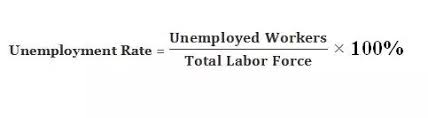

In [174]:
# Counts the number of employed, unemployed workers and retired (aging) people
employed_workers = employed.value_counts().sum()
unemployed_workers = unemployed.value_counts().sum()
retired_people = retired.value_counts().sum()

# Shows the number of employed, unemployed people and retirees
print(f"{employed_workers} people are employed")
print(f"{unemployed_workers} people are unemployed")
print(f"{retired_people} people are retired")

5645 people are employed
614 people are unemployed
1073 people are retired


In [122]:
# Calculates the unemployement rate in the town
total_labour_force = employed_workers + unemployed_workers
unemployement_rate = (unemployed_workers / total_labour_force) * 100

print(f"The Unemployement rate of the town is {round(unemployement_rate, 1)} %")

The Unemployement rate of the town is 9.8 %


Text(0.5, 1.0, 'Unemployed Count by Age')

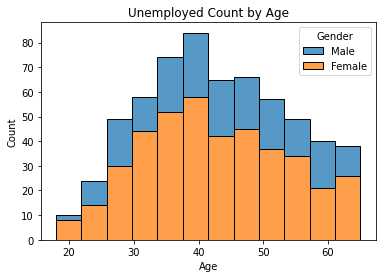

In [123]:
sns.histplot(data = unemployed, x = 'Age', hue = 'Gender', multiple = 'stack')
plt.title('Unemployed Count by Age')

### Religious Affiliations

In [124]:
census["Religion"].value_counts()

None         3402
N/A          2669
Christian    2472
Catholic     1162
Methodist     637
Muslim        144
Sikh           64
Jewish         36
Bahai           6
Buddist         1
Name: Religion, dtype: int64

Text(0.5, 1.0, 'Religious Affliliations and number of people that practice them')

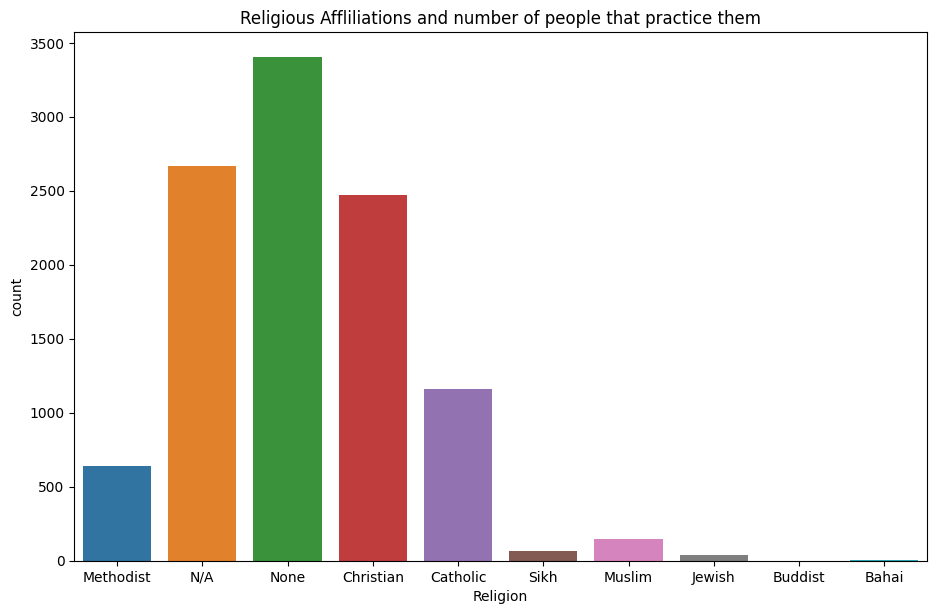

In [125]:
# The plot shows how many people practise each religion
plt.figure(figsize = (11,7), dpi = 100)
sns.countplot(data = census, x = "Religion").set_title("Religious Affliliations and number of people that practice them")


In [126]:
# Christian religion has the highest number of people in the proposed town
christian_mode = census[census["Religion"] == "Christian"]["Age"].mode()
christian_avg = census[census["Religion"] == "Christian"]["Age"].mean()

In [127]:
print(f"The most modal age that practice christianity is {christian_mode} ")


The most modal age that practice christianity is 0    56
dtype: int64 


In [128]:
print(f"The average age that practice christianity is {round(christian_avg)} years")

The average age that practice christianity is 49 years


In [129]:
christians_aged_50 = census[(census["Religion"] == "Christian") & (census["Age"] > 50)].value_counts().sum()

print(f"The number of Christians aged more than 50 years is {christians_aged_50}")

The number of Christians aged more than 50 years is 1230


In [130]:
christians_under_50 = census[(census["Religion"] == "Christian") & (census["Age"] <= 50)].value_counts().sum() 

print(f"The number of Christians 50 years and less is {christians_under_50}")

The number of Christians 50 years and less is 1242


### Marriage and Divorce Rate

<AxesSubplot:xlabel='Age', ylabel='Marital Status'>

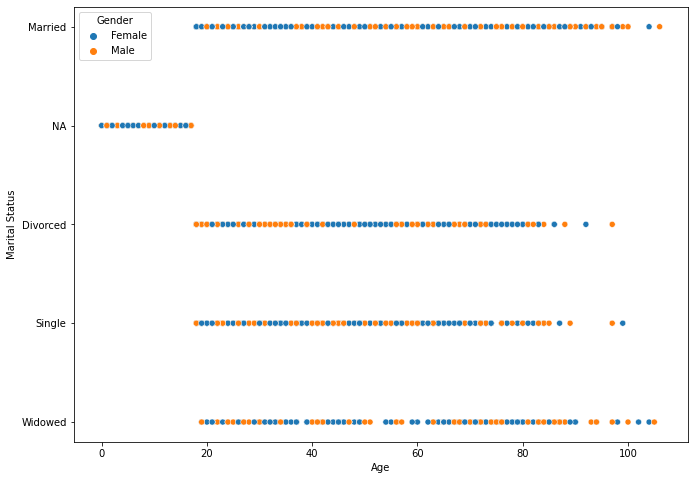

In [131]:
# Plot below shows how Age relates to marital status with respect to corresponding gender
plt.figure(figsize=(11,8))
sns.scatterplot(data = census, x = "Age", y = "Marital Status", hue = "Gender")

In [132]:
married = census.loc[(census["Marital Status"] == "Married")] # List of married people
divorced = census.loc[(census["Marital Status"] == "Divorced")] # List of divorced people

In [133]:
married # Married people

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
0,1,Morar Lane,Stephanie,Turner,48,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist,Employed,45-49
1,1,Morar Lane,Nathan,Turner-Owen,52,Husband,Married,Male,Mudlogger,None,Methodist,Employed,50-54
7,3,Morar Lane,Leigh,Moore,81,Head,Married,Male,Retired Chartered certified accountant,None,None,Retired,80-84
8,3,Morar Lane,Ann,Moore,84,Wife,Married,Female,Retired Environmental manager,None,None,Retired,80-84
9,4,Morar Lane,Dale,Brown,50,Head,Married,Male,Contractor,None,Christian,Employed,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,1,Griffiths Fort,Stephen,Burgess,43,Husband,Married,Male,Diagnostic radiographer,None,None,Employed,40-44
10543,1,Collier Hall,Lauren,Chandler,46,Head,Married,Female,Broadcast journalist,None,Catholic,Employed,45-49
10544,1,Collier Hall,Marc,Chandler,48,Husband,Married,Male,Games developer,None,Catholic,Employed,45-49
10569,1,Ford Folly,Gareth,Hamilton,95,Head,Married,Male,Retired General practice doctor,None,Catholic,Retired,90-95


In [134]:
divorced # divorced people

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
5,2,Morar Lane,Linda,Wilson,45,Head,Divorced,Female,Armed forces logistics/support/administrative ...,None,None,Employed,40-44
15,6,Morar Lane,Simon,Roberts-Fletcher,69,Cousin,Divorced,Male,Retired Chiropodist,None,None,Retired,65-69
17,6,Morar Lane,Bethany,Roberts-Fletcher,66,Cousin,Divorced,Female,Metallurgist,None,None,Employed,65-69
21,8,Morar Lane,Neil,Taylor,67,Head,Divorced,Male,Armed forces training and education officer,None,Catholic,Employed,65-69
25,10,Morar Lane,Carole,Hanson,34,Head,Divorced,Female,"Doctor, general practice",None,Christian,Employed,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,1,Martin Rectory,Damian,Clark,33,Son,Divorced,Male,Freight forwarder,None,Methodist,Employed,30-34
10585,1,Martin Rectory,Thomas,Clark,28,Son,Divorced,Male,Art therapist,None,Methodist,Employed,25-29
10586,1,Martin Rectory,Colin,Clark,28,Son,Divorced,Male,Electrical engineer,None,None,Employed,25-29
10588,1,Hollywood Barracks,Shirley,Goddard,21,Head,Divorced,Female,Unemployed,None,None,Unemployed,20-24


In [135]:
print(f" {(married).value_counts().sum()} people are married")

 2989 people are married


In [136]:
print(f"{(divorced).value_counts().sum()} people are divorced")

997 people are divorced


The marriage and divorce rates will be calculated to make reasonable analysis and recommendations 

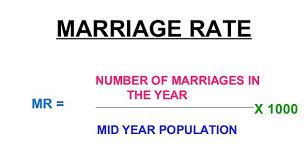

In [137]:
marriages = (((married).value_counts().sum()) / 2) # The number of marriages because it has to be a pair
marriage_rate = ((marriages) / len(census)) * 1000 # Marriage rate
divorce_rate = (len(divorced) / len(census)) * 1000 # Divorce rate

In [138]:
print(f"The marriage rate is {round(marriage_rate)} per 1000 population (aged 18 and older)")
print(f"The divorce rate is {round(divorce_rate)} per 1000 population (aged 18 and older)")

The marriage rate is 141 per 1000 population (aged 18 and older)
The divorce rate is 94 per 1000 population (aged 18 and older)


### Occupancy Level

This is the number of people per household

In [139]:
# Household occupancy
occupancy = census.groupby(["House Number", "Street"]).size()

In [140]:
# The house with the highest number of occupants
occupants = occupancy.to_frame(name = "Occupant(s)").reset_index()
occupants

,House Number,Street,Occupant(s)
0,1,Adams Drive,1
1,1,Allen Crossroad,2
2,1,Arch Garden,3
3,1,Armagh Lane,1
4,1,Bailey Rapid,4
...,...,...,...
3536,99,Evans Mission,4
3537,99,Jones Keys,2
3538,99,Tegid Road,12
3539,99,Warren Shoals,4


There are 3,541 houses in the town, of which some houses are over-occupied. The over-occupied house(s) will be checked to see how it affects the proposed task outcome.

In [141]:
occupants["Occupant(s)"].value_counts()

2     837
1     783
4     693
3     650
5     397
6      99
7      23
8      12
9      10
10      9
11      9
12      6
19      4
21      3
13      2
14      2
16      1
18      1
Name: Occupant(s), dtype: int64

In [142]:
# shows that a house with 21 occupants is not reasonable and causes congestion
print(f"The details of the house with highest number of occupants: \n\n {occupants.max()}")

The details of the house with highest number of occupants: 

 House Number             99
Street          Wright Hill
Occupant(s)              21
dtype: object


In [143]:
occupants.describe()

,Occupant(s)
count,3541.000000
mean,2.991528
std,1.879397
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


### Cummuters

They are total number of University Students, Employed workers and other professions that are likely to commute to and from places of work

In [144]:
commuters = census[census["Employment Status"].isin(["Employed", "University Student"])]
commuters

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
0,1,Morar Lane,Stephanie,Turner,48,Head,Married,Female,Chartered legal executive (England and Wales),None,Methodist,Employed,45-49
1,1,Morar Lane,Nathan,Turner-Owen,52,Husband,Married,Male,Mudlogger,None,Methodist,Employed,50-54
5,2,Morar Lane,Linda,Wilson,45,Head,Divorced,Female,Armed forces logistics/support/administrative ...,None,None,Employed,40-44
9,4,Morar Lane,Dale,Brown,50,Head,Married,Male,Contractor,None,Christian,Employed,45-49
10,4,Morar Lane,Joyce,Brown,49,Wife,Married,Female,Photographer,None,Christian,Employed,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,1,Martin Rectory,Thomas,Clark,28,Son,Divorced,Male,Art therapist,None,Methodist,Employed,25-29
10586,1,Martin Rectory,Colin,Clark,28,Son,Divorced,Male,Electrical engineer,None,None,Employed,25-29
10587,1,Martin Rectory,Alice,Clark,21,Daughter,Single,Female,University Student,None,Methodist,University Student,20-24
10590,1,Hollywood Barracks,Steven,Leonard,57,Lodger,Widowed,Male,"Sound technician, broadcasting/film/video",None,Muslim,Employed,55-59


In [145]:
print(f" {commuters.value_counts().sum()} people are likely to be commuters")

 6369 people are likely to be commuters


#### Migration 
Also, migration contributes to the growth of the popluation

In [146]:
# List of household lodgers and visitors are regarded as immigrants
immigrants = census[(census["Relationship to Head of House"] == "Lodger") | (census["Relationship to Head of House"] == "Visitor")].value_counts().sum()
print(f"There are {immigrants} immigrants in the town")

There are 406 immigrants in the town


In [147]:
# List of divorcees aged 18 and older are regarded as emigrants considering their employement status
male = census[(census['Marital Status'] == 'Divorced') & (census['Occupation'] != 'Student') & (census["Gender"] == "Male")].value_counts().sum()
female = census[(census['Marital Status'] == 'Divorced') & (census['Occupation'] != 'Student') & (census["Gender"] == "Female")].value_counts().sum()

emigrants = female - male
print(f"There are likely {emigrants} emigrants in the town")

There are likely 272 emigrants in the town


Migration Rate = 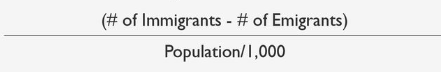

In [148]:
total_population = census.value_counts().sum()
migration_rate = ((immigrants - emigrants) / (total_population)) * 1000

print(f"The Net Migration Rate per thousand is: {round(migration_rate, 1)}" )

The Net Migration Rate per thousand is: 12.7


### Birth Rate and Death Rate
The birth rate is the number of births in a particular year per thousand people in the population while death rate is the number of deaths in that particular year per thousand people. The evaluation for this is shown in the next cells

In [149]:
census[census["Age"] == 0] # List of babies/ births in this present year

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
59,21,Morar Lane,Gavin,Brown,0,Son,NA,Male,Child,None,N/A,Child,0-4
110,4,Kingnod Road,Megan,Smith,0,Daughter,NA,Female,Child,None,N/A,Child,0-4
358,4,Evans Mission,Marilyn,Grant,0,Daughter,NA,Female,Child,None,N/A,Child,0-4
359,4,Evans Mission,Georgia,Grant,0,Daughter,NA,Female,Child,None,N/A,Child,0-4
372,9,Evans Mission,Pamela,Yates,0,Daughter,NA,Female,Child,None,N/A,Child,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197,20,Newcastle Trail,Marcus,Goddard,0,Son,NA,Male,Child,None,N/A,Child,0-4
10291,7,Hayward Alley,Irene,Wilson,0,Daughter,NA,Female,Child,None,N/A,Child,0-4
10303,9,Hayward Alley,Gareth,Moore,0,Son,NA,Male,Child,None,N/A,Child,0-4
10377,19,Hayward Alley,Sean,O'Neill-Wilson,0,Son,NA,Male,Child,None,N/A,Child,0-4


In [150]:
census[census["Age"] == 4] # List of babies/ births 4 years ago

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Group
84,8,Hooper Avenue,Debra,Palmer,4,Adopted Daughter,NA,Female,Child,None,N/A,Child,0-4
318,2,Lawson Villages,Naomi,Ali,4,Daughter,NA,Female,Child,None,N/A,Child,0-4
333,5,Lawson Villages,Josephine,Ward,4,Daughter,NA,Female,Child,None,N/A,Child,0-4
413,25,Evans Mission,Joel,Shaw,4,Son,NA,Male,Child,None,N/A,Child,0-4
492,57,Evans Mission,Harry,Gibbons,4,Son,NA,Male,Child,None,N/A,Child,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10434,28,Hayward Alley,Denis,Foster,4,Son,NA,Male,Child,None,N/A,Child,0-4
10459,6,Cox Turnpike,Nicholas,Hardy-Kelly,4,Son,NA,Male,Child,None,N/A,Child,0-4
10540,1,Griffiths Fort,Anna,Burgess,4,Daughter,NA,Female,Child,None,N/A,Child,0-4
10557,1,Candlestick Lighthouse,Susan,Barnett,4,Daughter,NA,Female,Child,None,N/A,Child,0-4


Ages between 18 years and 45 years will be analysed to give a more concise overview of crude birth and death rates

In [151]:
previous_births = census[census["Age"] == 4].value_counts().sum()
print(f"4 years ago, there were {previous_births} births in the town")

4 years ago, there were 115 births in the town


In [152]:
number_of_births = census[census["Age"] == 0].value_counts().sum()
print(f"Presently, there are {number_of_births} births in the town")

Presently, there are 102 births in the town


#### Birth Rate:
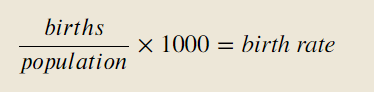

In [153]:
total_population = census.value_counts().sum() # The town's total population

previous_birth_rate = (previous_births / total_population) * 1000
birth_rate = (number_of_births / total_population) * 1000 # Evaluating the birth rate

In [154]:
print(f"The Birth Rate for the town per thousand is {round(previous_birth_rate)} four years ago") 
print(f"The Birth Rate for the town per thousand is {round(birth_rate)} for this year") 

The Birth Rate for the town per thousand is 11 four years ago
The Birth Rate for the town per thousand is 10 for this year


#### Death Rate:
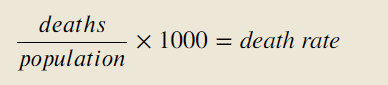

In [155]:
previous_deaths =  (census[(census["Age"] > 76) & (census["Age"] <= 102)]).value_counts().sum()
possible_deaths = (census[census["Age"] > 80]).value_counts().sum()

print(f"There were {previous_deaths} deaths Four years ago")
print(f"There could be possibly {possible_deaths} deaths in the coming years")

There were 343 deaths Four years ago
There could be possibly 210 deaths in the coming years


In [156]:
previous_death_rate = (previous_deaths / total_population) * 1000
death_rate = (possible_deaths / total_population) * 1000

print(f"The Death Rate for the town per thousand was {round(previous_death_rate)} four years ago") 
print(f"The Death Rate for the town per thousand is {round(death_rate)} for this year") 

The Death Rate for the town per thousand was 32 four years ago
The Death Rate for the town per thousand is 20 for this year


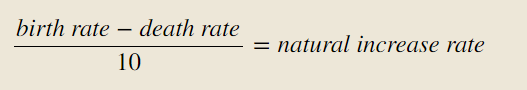

In [157]:
natural_increase = (birth_rate - death_rate) / 10 # Deduced from the expression above

print(f" There is a natural population increase rate of {round(natural_increase, 1)}")

 There is a natural population increase rate of -1.0


#### Population Growth 
This is know if the population growth is increasing or decreasing

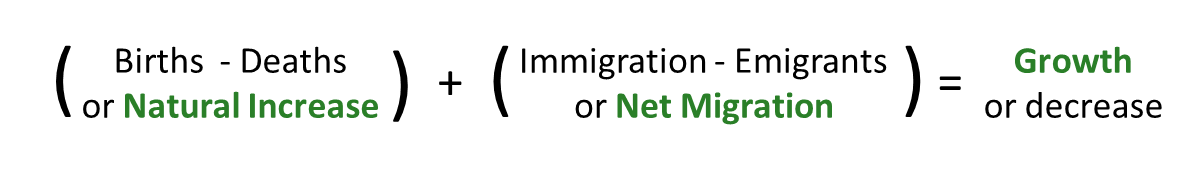

In [158]:
# Using the expression above, the population growth 
# will be decided if it is increasing or declining

growth_rate = (((number_of_births - possible_deaths) + (immigrants - emigrants)) / total_population) * 100

print(f" There's a probable population growth increase  of {growth_rate:.2f} %")

 There's a probable population growth increase  of 0.25 %


The is a slight increase in population growth. However, the report for this analysis will describe how it contributes to the town's growth, development and investment considering other essential factors. 